In [ ]:
from google.colab import drive #구글드라이브에 연동
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(1440, 2560, 3)
[[  0   0 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


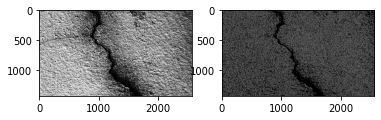

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

def resize(img, size): #사진 사이즈 변환
    return cv2.resize(img, size)

def grayscale(img):#회색으로 이미지
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img,(kernel_size, kernel_size),0)

def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def hist_norm(img): #히스토그램이 그레이스케일 전체 구간에서 균일한 분포로 나타나도록 변경
    equ = cv2.equalizeHist(img)
    return equ

temp_path ='/content/drive/MyDrive/틈직한 판정단/before_canny_edege_images/101_c886eca8-04e0-4d23-90ae-e1237dd28c68.tiff'
temp_img = cv2.imread(temp_path)
print(np.shape(temp_img))

# temp_img = grayscale(temp_img)
temp_img = hist_norm(grayscale(temp_img))

# temp_canny = canny(gaussian_blur(temp_img, 7), 100, 150) #가우시안 블러로 노이즈 완화
temp_canny = canny(temp_img, 100, 200)
print(temp_canny)

plt.subplot(1, 2, 1)
plt.imshow(temp_img, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.imshow(temp_canny, cmap = 'gray')

This image is: <class 'numpy.ndarray'> with dimensions: (1440, 2560, 3)


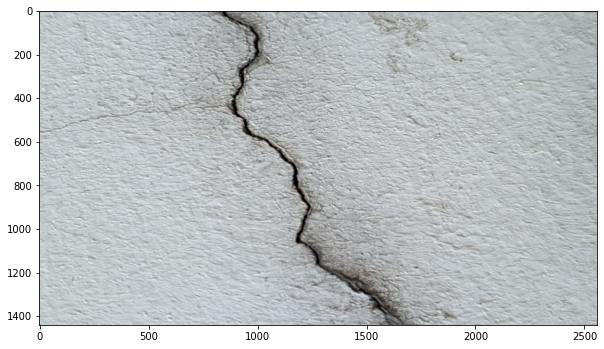

In [ ]:
import matplotlib.pyplot as plt#그래프 형태로 나타내기
import matplotlib.image as mpimg
import cv2
%matplotlib inline

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img,(kernel_size, kernel_size),0)

def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

#이미지 읽어오기
img = mpimg.imread('/content/drive/MyDrive/틈직한 판정단/before_canny_edege_images/101_c886eca8-04e0-4d23-90ae-e1237dd28c68.tiff')

#시각화
plt.figure(figsize=(10,8))
print('This image is:', type(img), 'with dimensions:', img.shape)
plt.imshow(img)
plt.show()


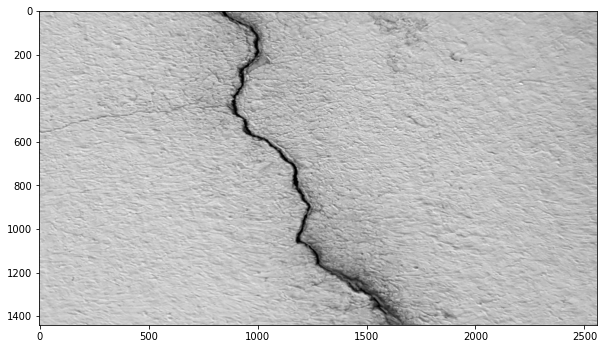

In [ ]:
def grayscale(img):#회색으로 사진 변환
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = grayscale(img)
plt.figure(figsize=(10,8))
plt.imshow(gray,cmap='gray')
plt.show()


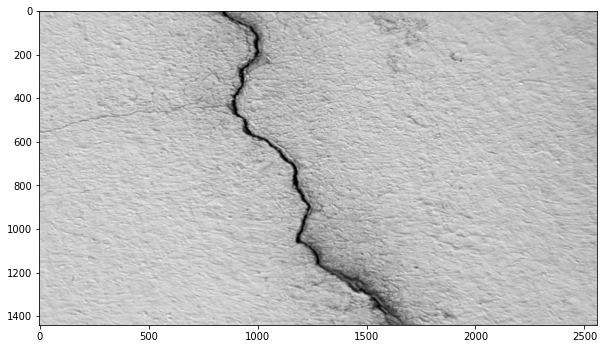

In [ ]:
def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img,(kernel_size, kernel_size),0)
kernel_size = 5
blur_gray = gaussian_blur(gray, kernel_size)#블러함수로 블러링

plt.figure(figsize=(10,8))
plt.imshow(blur_gray, cmap='gray')
plt.show()

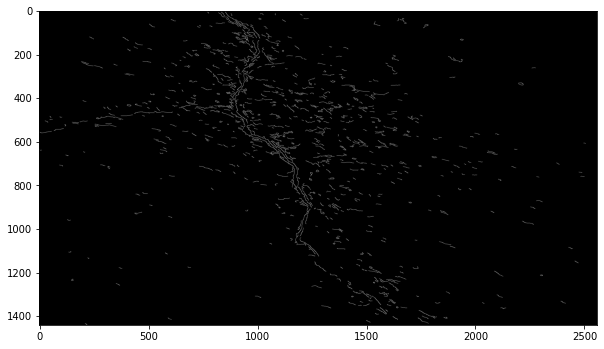

In [ ]:
def canny(img, low_threshold, high_threshold):#최대 임계값과 최소임계값 변환으로 균열이 잘 보이도록 변환
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

low_threshold = 100
high_threshold = 200

edges = canny(blur_gray, low_threshold, high_threshold)

plt.figure(figsize=(10,8))
plt.imshow(edges, cmap='gray')
plt.show()
